In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## 10.1
### a)


In [2]:
X = np.random.random((1000, 2)) * [2, 1]

## b)

In [3]:
def h(p, q, sigma):
    return np.exp(-((q-p)**2) / (2.*sigma**2))

def som(K=4, eps=1, sigma=2, eta=0.1, d_eps=0.999, d_sigma=0.99, eps_end=1E-5):
    # initialise prototypes:
    W = np.mean(X, axis=0) + np.random.normal(0, eta, (K, 2)) 

    while eps > eps_end:
        x = X[np.random.randint(1000)]
        #d = np.sum(abs(x - W), axis=1)
        d = np.linalg.norm(x - W, axis=1)
        p = np.where(d == np.min(d))[0][0]
        dW = (eps * h(p, np.arange(K), sigma) * (x - W).T).T
        W += dW
        eps *= d_eps
        sigma *= d_sigma
    return W

## c & d)

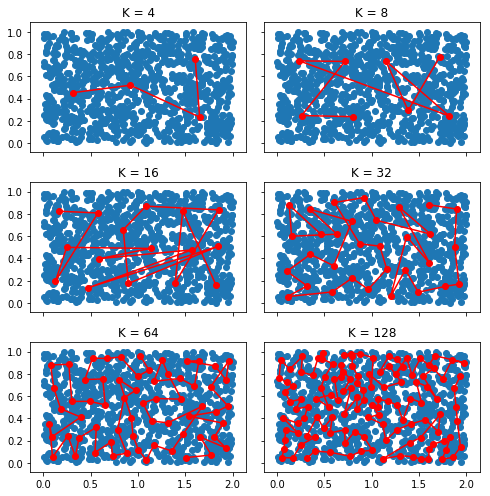

In [4]:
Ks = [4, 8, 16, 32, 64, 128]
fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(7, 7))
for ax, K in zip(axes.flatten(), Ks):
    W = som(K=K, sigma=10)
    ax.scatter(X[:,0], X[:,1])
    ax.scatter(W[:,0], W[:,1], c='red')
    ax.set_title('K = %d' % K)
    ax.plot(W[:,0], W[:,1], c='red')
plt.tight_layout()

## 10.2
### a)

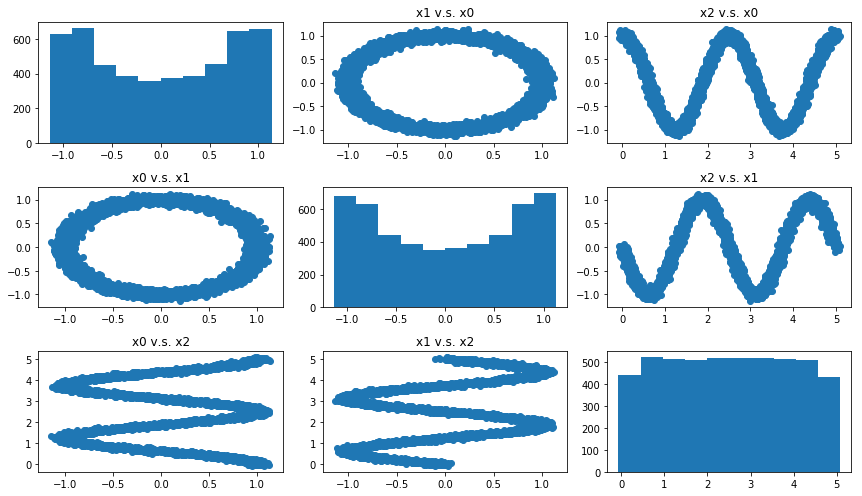

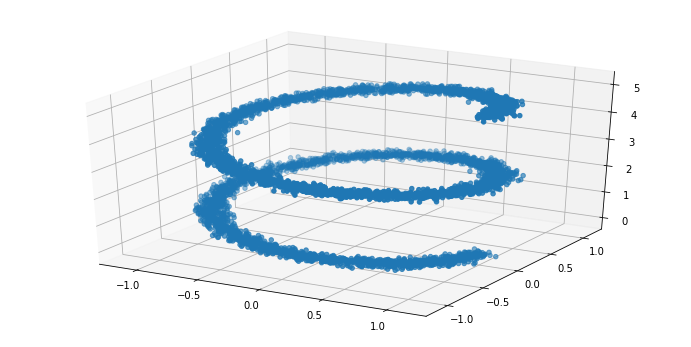

In [5]:
data = np.genfromtxt('./spiral.csv', delimiter=',', skip_header=1)[:,1:]
fig, axes = plt.subplots(3, 3, figsize=(12, 7))
for i in range(3):
    for j in range(3):
        if i == j:
            axes[i][j].hist(data[:,i])
        else:
            axes[i][j].scatter(data[:,j], data[:,i])
            axes[i][j].set_title('x%d v.s. x%d' % (j, i))
plt.tight_layout()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(data[:,0], data[:,1], data[:,2])

## b)

In [6]:
def h(p, q, sigma):
    return np.exp(-((q-p)**2) / (2.*sigma**2))

def som(K=4, X = data, eps=1, sigma=2, eta=0.1, d_eps=0.999, d_sigma=0.99, eps_end=1E-5):
    # initialise prototypes:
    xy = np.mean(X, axis=0)[:2] + np.random.normal(0, eta, (K, 2)) 
    W = np.append(xy, np.arange(0, 5, 5. / float(K))).reshape(3, K).T

    while eps > eps_end:
        x = X[np.random.randint(len(X))]
        #d = np.sum(abs(x - W), axis=1)
        d = np.linalg.norm(x-W, axis=1)
        p = np.where(d == np.min(d))[0][0]
        dW = (eps * h(p, np.arange(K), sigma) * (x - W).T).T
        W += dW
        eps *= d_eps
        sigma *= d_sigma
    return W

## c & d)

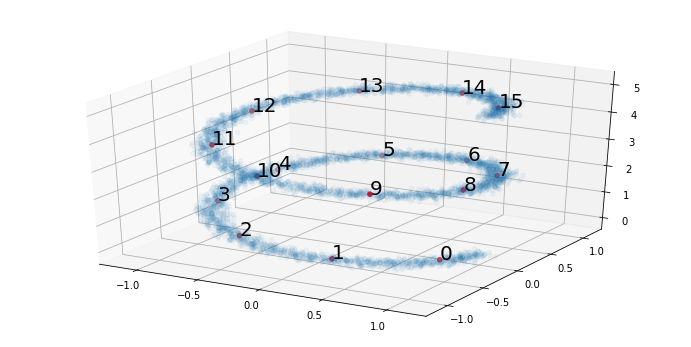

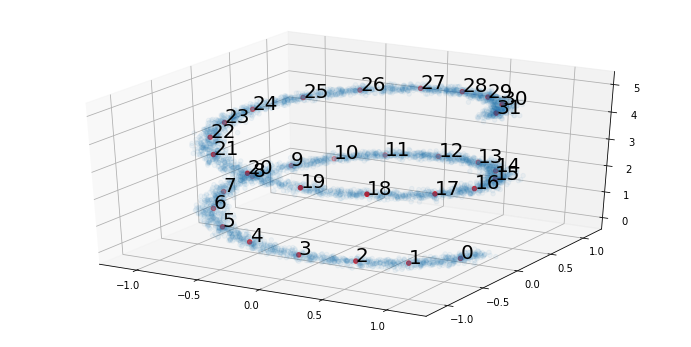

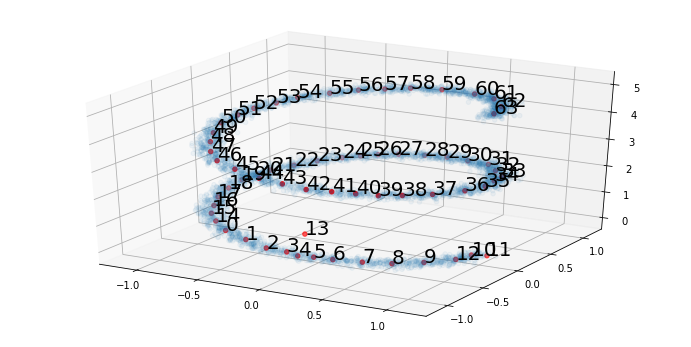

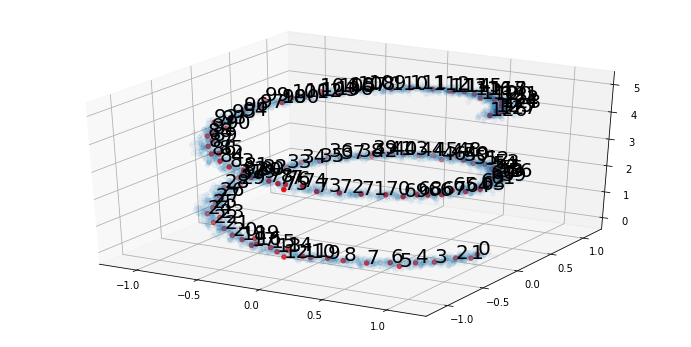

In [7]:
Ks = [16, 32, 64, 128]
#fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(7, 7))
for ax, K in zip(axes.flatten(), Ks):
    W = som(K=K, sigma=10)
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(data[:,0], data[:,1], data[:,2], alpha=0.05)
    ax.scatter3D(W[:,0], W[:,1], W[:,2], c='red')
    for i in range(len(W)):
        ax.text(W[i,0],W[i,1],W[i,2],  '%s' % (str(i)), size=20, zorder=1)

    
#plt.tight_layout()

## 10.3
### a)

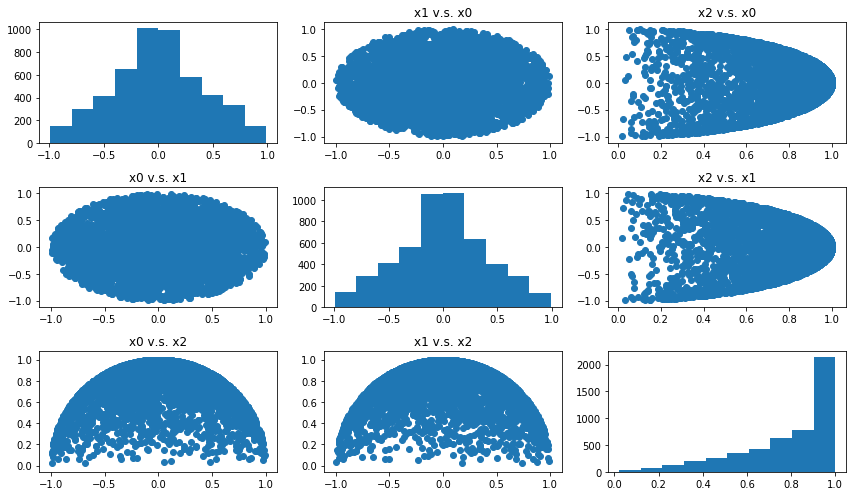

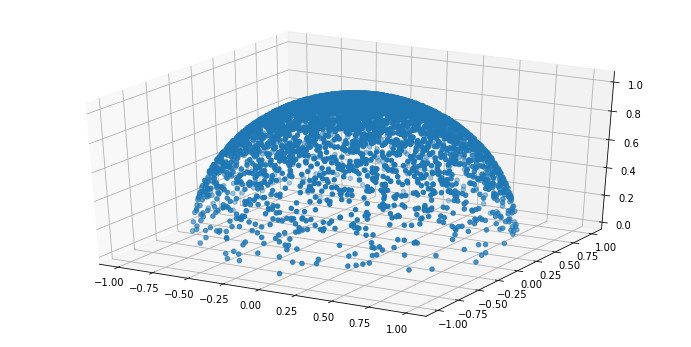

In [8]:
data = np.genfromtxt('./bowl.csv', delimiter=',', skip_header=1)[:,1:]
fig, axes = plt.subplots(3, 3, figsize=(12, 7))
for i in range(3):
    for j in range(3):
        if i == j:
            axes[i][j].hist(data[:,i])
        else:
            axes[i][j].scatter(data[:,j], data[:,i])
            axes[i][j].set_title('x%d v.s. x%d' % (j, i))
plt.tight_layout()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(data[:,0], data[:,1], data[:,2])

## b & c)

In [9]:
def h(p, q, sigma):
    return np.exp(-((q-p)**2) / (2.*sigma**2))

def som(K=4, X = data, eps=1, sigma=2, eta=0.1, d_eps=0.999, d_sigma=0.99, eps_end=1E-5):
    # initialise prototypes:
    W = np.mean(X, axis=0) + np.random.normal(0, eta, (K*K, 3)) 

    qs = np.zeros((K*K, 2))
    i = 0
    for x in range(K):
        for y in range(K):
            qs[i] = [x, y]
            i += 1
    
    while eps > eps_end:
        x = X[np.random.randint(len(X))]
        #d = np.sum(abs(x - W), axis=1)
        d = np.linalg.norm(x-W, axis=1)
        p = np.where(d == np.min(d))[0][0]
        dW = (eps * np.linalg.norm(h(qs[p], qs, sigma), axis=1) * (x - W).T).T
        W += dW
        eps *= d_eps
        sigma *= d_sigma
    return W

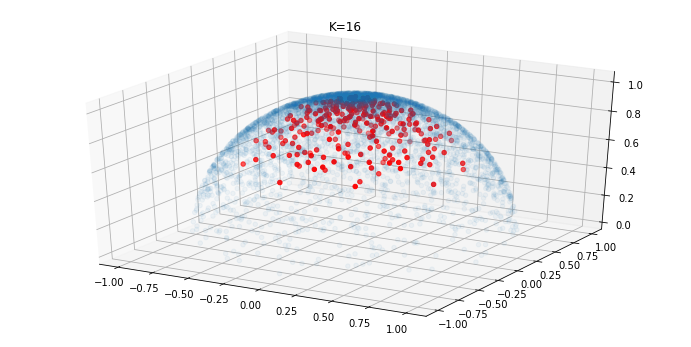

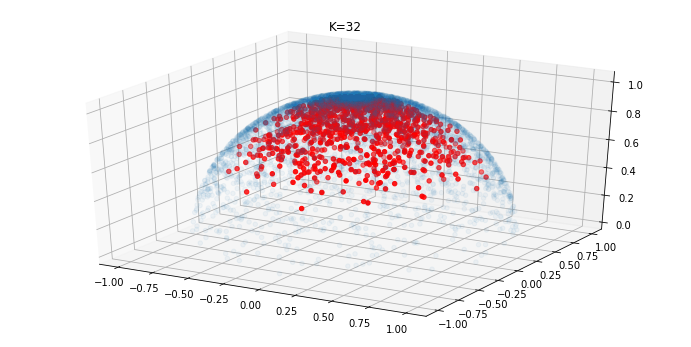

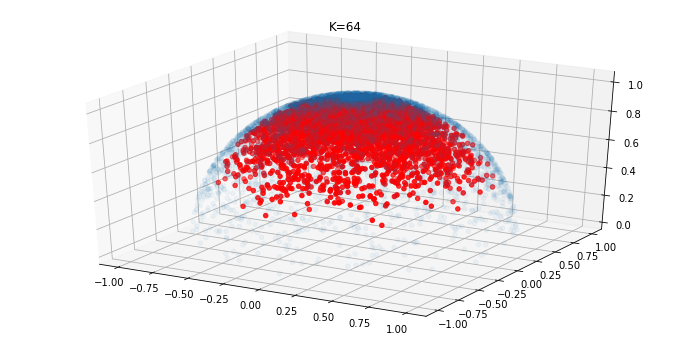

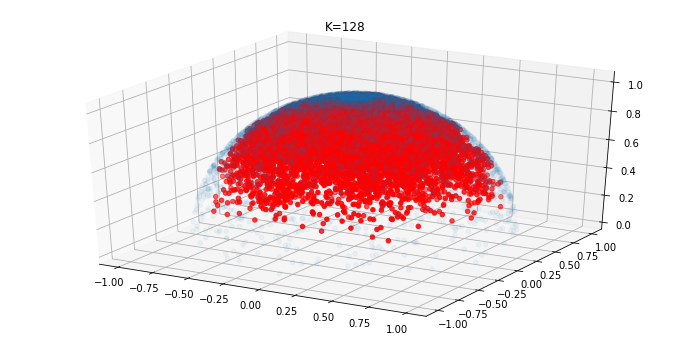

In [10]:
Ks = [16, 32, 64, 128]
#fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(7, 7))
for ax, K in zip(axes.flatten(), Ks):
    W = som(K=K, sigma=10)
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(data[:,0], data[:,1], data[:,2], alpha=0.05)
    ax.scatter3D(W[:,0], W[:,1], W[:,2], c='red')
    ax.set_title('K=%d' % K)
#plt.tight_layout()

## d)

In [11]:
def h(p, q, sigma):
    return np.exp(-((q-p)**2) / (2.*sigma**2))

def som_t(K=4, X = data, eps=1, sigma=2, eta=0.1, d_eps=0.999, d_sigma=0.99, eps_end=1E-5):
    # initialise prototypes:
    
    W = np.mean(X, axis=0) + np.random.normal(0, eta, (K*K, 3)) 
    Ws = [np.copy(W)]
    qs = np.zeros((K*K, 2))
    i = 0
    for x in range(K):
        for y in range(K):
            qs[i] = [x, y]
            i += 1
    
    while eps > eps_end:
        x = X[np.random.randint(len(X))]
        #d = np.sum(abs(x - W), axis=1)
        d = np.linalg.norm(x-W, axis=1)
        p = np.where(d == np.min(d))[0][0]
        dW = (eps * np.linalg.norm(h(qs[p], qs, sigma), axis=1) * (x - W).T).T
        W += dW
        eps *= d_eps
        sigma *= d_sigma
        Ws.append(np.copy(W))
    return Ws

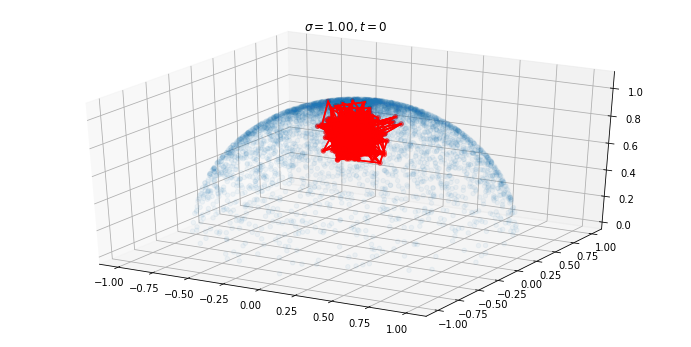

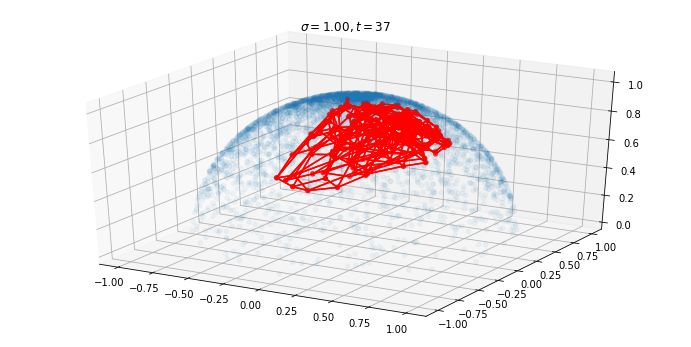

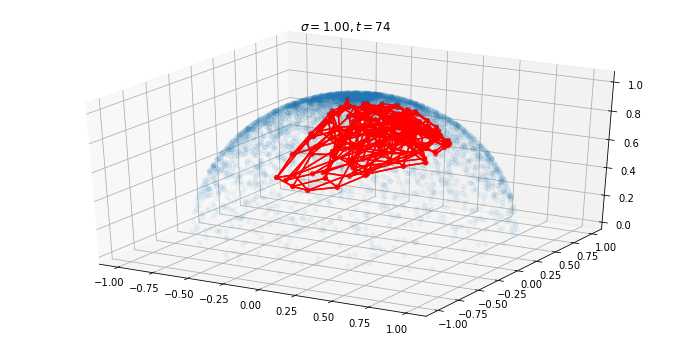

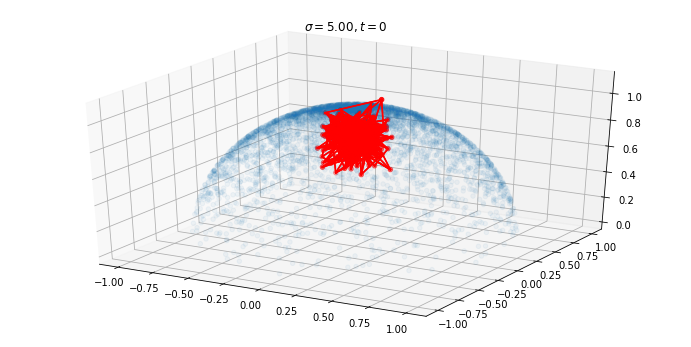

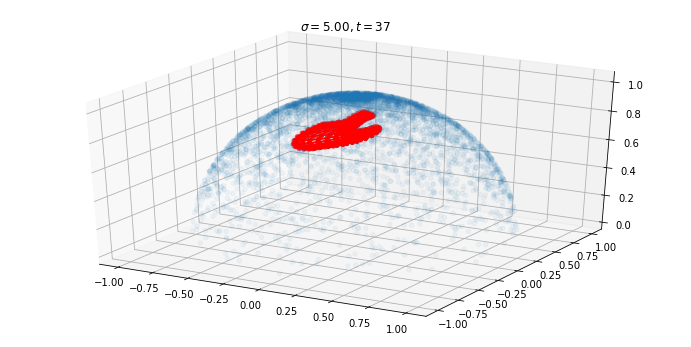

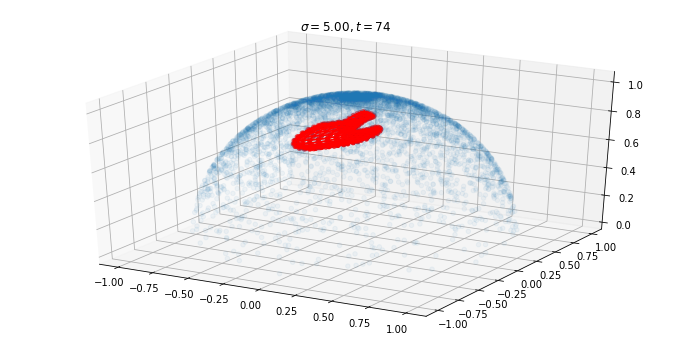

In [34]:
K=16
sigmas = [1, 5];
for sigma in sigmas:
    Ws = som_t(K=K, sigma=sigma, eps=0.99, d_eps=0.9)
    for i, W in enumerate([Ws[0], Ws[int(len(Ws) / 2.)], Ws[-1]]):
        fig = plt.figure(figsize=(12, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter3D(data[:,0], data[:,1], data[:,2], alpha=0.05)
        ax.scatter3D(W[:,0], W[:,1], W[:,2], c='red')
        ax.set_title('$\sigma=%.2f, t=%d$' % (sigma, i * len(Ws)/3.))
        qs = np.zeros((K*K, 2))
        i = 0
        for x in range(K):
            for y in range(K):
                qs[i] = [x, y]
                i += 1
        for i, b in enumerate(qs):
            d = np.sum(abs(qs - b), axis=1)
            ix = np.where(d == 1)[0]
            a = W[i]
            for x, y, z in W[ix]:
                ax.plot([a[0], x], [a[1], y], [a[2], z], c='red')
#plt.tight_layout()

## e)

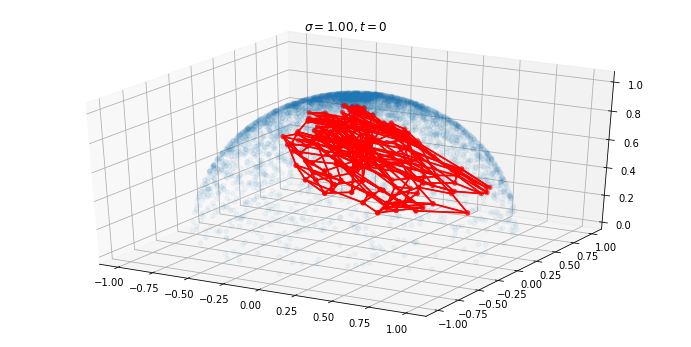

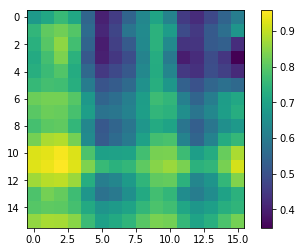

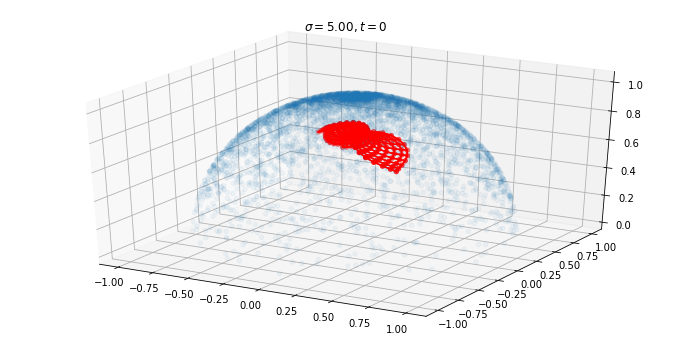

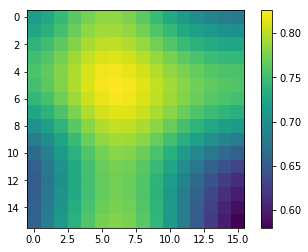

In [44]:
K=16
sigmas = [1, 5];
for sigma in sigmas:
    Ws = som_t(K=K, sigma=sigma, eps=0.99, d_eps=0.9)
    for i, W in enumerate([Ws[-1]]):
        fig = plt.figure(figsize=(12, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter3D(data[:,0], data[:,1], data[:,2], alpha=0.05)
        ax.scatter3D(W[:,0], W[:,1], W[:,2], c='red')
        ax.set_title('$\sigma=%.2f, t=%d$' % (sigma, i * len(Ws)/3.))
        qs = np.zeros((K*K, 2))
        i = 0
        for x in range(K):
            for y in range(K):
                qs[i] = [x, y]
                i += 1
        for i, b in enumerate(qs):
            d = np.sum(abs(qs - b), axis=1)
            ix = np.where(d == 1)[0]
            a = W[i]
            for x, y, z in W[ix]:
                ax.plot([a[0], x], [a[1], y], [a[2], z], c='red')
        plt.show()
        M = np.zeros((K, K))
        for i, a in enumerate(qs):
            x = int(a[0])
            y = int(a[1])
            M[x, y] = W[i][2]
        plt.imshow(M);
        plt.colorbar()
        plt.show()